1.Load data

In [64]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("a9a")
X_test, y_test = load_svmlight_file("a9a.t",n_features=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

(32561, 123)
(32561,)
(16281, 123)
(16281,)


2.Initalize logistic regression model parameters

In [65]:
import numpy as np
from numpy import *
import random
alpha =0.005
iters = 1500  
theta= np.ones((X_train.shape[1], 1))  
def sigmoid(x):  
    return 1/(1+np.exp(-x))

3.Select the loss function and calculate its derivation

In [66]:
def grad(theta,X,y):
    y=y.reshape(X.shape[0],1)
    h = sigmoid(X*theta)
    error = h - y 
    grad = X.T*error
    return grad
def fitRate_loss(theta,X,y):
    y=y.reshape(X.shape[0],1)
    h = sigmoid(X*theta)
    J = -(1/X.shape[0])*(y*np.log(h)+(1-y)*np.log(1-h)).sum() 
    h1= sigmoid(X*theta)
    h1[h1>0.5] = 1
    h1[h1<=0.5] = 0
    fit=np.count_nonzero(h1==y)
    fit_rate=fit/X.shape[0]
    return J,fit_rate

4.Calculate gradient from partial samples

In [67]:
def batchGradient(X,y,theta):
    j = random.randint(0,X.shape[0]-32) 
    batchX= X[j:j + 32]
    batchY= y[j:j + 32]
    Gbatch=grad(theta,batchX,batchY)
    return Gbatch

5.NAG

In [68]:
def NAG(theta,alpha=0.01,iters=100):
    v=0
    momentum=0.99
    J_nag=np.zeros(iters)
    J_nagTest=np.zeros(iters)
    F_nagTest=np.zeros(iters)
    F_nag=np.zeros(iters)
    for i in range(iters):
        G=batchGradient(X_train,y_train,theta)
        v_prev = v
        v = momentum*v-alpha*G
        theta=theta+momentum*(v-v_prev)
        J_nag[i],F_nag[i]=fitRate_loss(theta,X_train,y_train)
        J_nagTest[i],F_nagTest[i]=fitRate_loss(theta,X_test,y_test)
    return J_nag,J_nagTest,F_nagTest

6.RMSprop

In [69]:
def RMSprop(theta,alpha=0.2,iters=100):
    decay_rate=0.9
    J_RMSprop=np.zeros(iters)
    J_RMSpropTest=np.zeros(iters)
    F_RMSprop=np.zeros(iters)
    F_RMSpropTest=np.zeros(iters)
    cache=0
    for i in range(iters):
        G=batchGradient(X_train,y_train,theta)
        cache = decay_rate*cache+np.sum((1-decay_rate)*(G**2))
        theta = theta-alpha*G/(np.sqrt(cache+e))
        J_RMSprop[i],F_RMSprop[i]=fitRate_loss(theta,X_train,y_train)
        J_RMSpropTest[i],F_RMSpropTest[i]=fitRate_loss(theta,X_test,y_test)
    return J_RMSprop,J_RMSpropTest,F_RMSpropTest

7.AdaDelta

In [70]:
def AdaDelta(theta,alpha=2000,iters=100):
    delta=0.5
    J_AdaDelta=np.zeros(iters)
    J_AdaDeltaTest=np.zeros(iters)
    F_AdaDelta=np.zeros(iters)
    F_AdaDeltaTest=np.zeros(iters)
    cache_x=0
    cache_dx=0
    for i in range(iters):
        G=batchGradient(X_train,y_train,theta)
        cache_dx = delta*cache_dx + np.sum((1-delta)*(G**2))
        v = -np.sqrt(cache_x+1e-7)*G/(np.sqrt(cache_dx)+1e-7)
        theta = theta+alpha*v
        cache_x = delta*cache_x + np.sum((1-delta)*(v**2))
        J_AdaDelta[i],F_AdaDelta[i]=fitRate_loss(theta,X_train,y_train)
        J_AdaDeltaTest[i],F_AdaDeltaTest[i]=fitRate_loss(theta,X_test,y_test)
    return J_AdaDelta,J_AdaDeltaTest,F_AdaDeltaTest

8.Adam

In [71]:
def Adam(theta,alpha=0.1,iters=100):
    t=0
    m=0
    v=0
    beta1=0.9
    beta2=0.99
    J_Adam=np.zeros(iters)
    J_AdamTest=np.zeros(iters)
    F_Adam=np.zeros(iters)
    F_AdamTest=np.zeros(iters)
    for i in range(iters):
        G=batchGradient(X_train,y_train,theta)
        t=t+1
        m = beta1*m+np.sum((1-beta1)*G) 
        v = beta2*v+np.sum((1-beta2)*(G**2))
        mb = m/(1-(beta1**t))
        vb = v/(1-(beta2**t))
        theta= theta-alpha*mb/(np.sqrt(vb)+e)
        J_Adam[i],F_Adam[i]=fitRate_loss(theta,X_train,y_train)
        J_AdamTest[i],F_Adam[i]=fitRate_loss(theta,X_test,y_test)
    return J_Adam,J_AdamTest,F_Adam

9.Draw graph

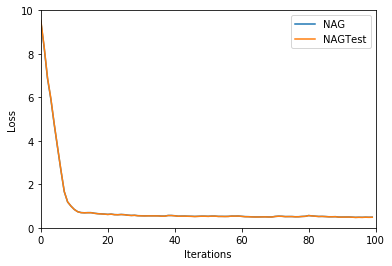

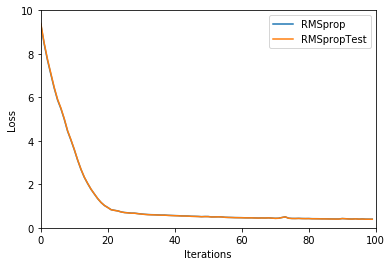

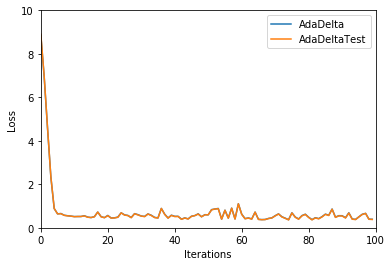

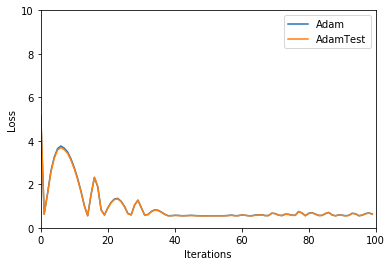

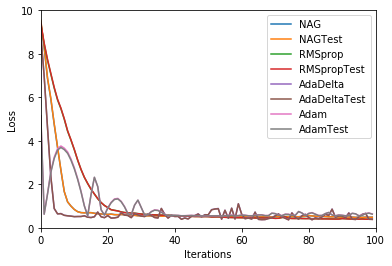

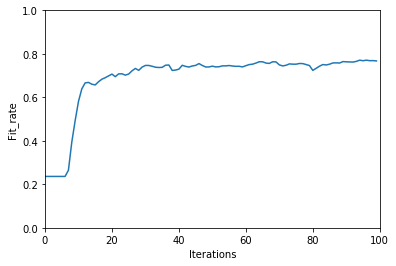

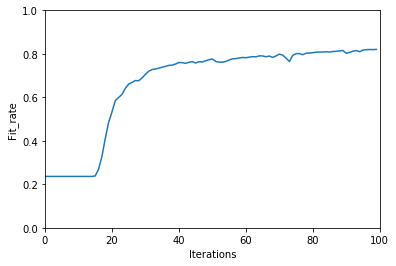

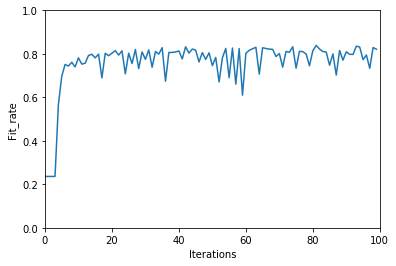

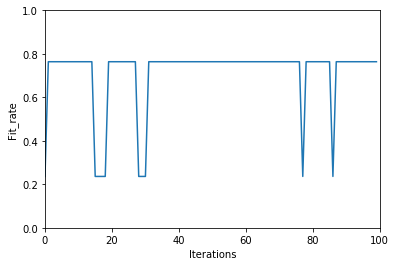

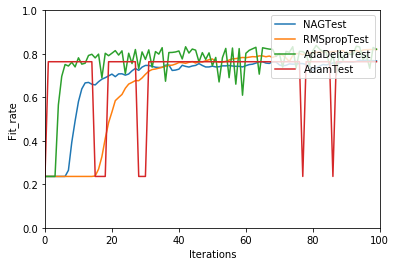

In [72]:
import matplotlib.pyplot as plt
L_nag,L_nagTest,F_nagTest=NAG(theta)
L_RMSprop,L_RMSpropTest,F_RMSpropTest=RMSprop(theta)
L_AdaDelta,L_AdaDeltaTest,F_AdaDeltaTest=AdaDelta(theta)
L_Adam,L_AdamTest,F_AdamTest=Adam(theta)
def P_lossLine(l_nag,l_nagTest,l_RMSprop,l_RMSpropTest,l_AdaDelta,l_AdaDeltaTest,l_Adam,l_AdamTest):
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.plot(l_nag,label="NAG")
    plt.plot(l_nagTest, label="NAGTest")
    plt.legend(loc ='upper right')
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.plot(l_RMSprop,label="RMSprop")
    plt.plot(l_RMSpropTest, label="RMSpropTest")
    plt.legend(loc ='upper right')
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.plot(l_AdaDelta,label="AdaDelta")
    plt.plot(l_AdaDeltaTest, label="AdaDeltaTest")
    plt.legend(loc ='upper right')
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.legend(loc ='upper right')
    plt.plot(l_Adam,label="Adam")
    plt.plot(l_AdamTest, label="AdamTest")
    plt.legend(loc ='upper right')
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.plot(l_nag,label="NAG")
    plt.plot(l_nagTest, label="NAGTest")
    plt.plot(l_RMSprop,label="RMSprop")
    plt.plot(l_RMSpropTest, label="RMSpropTest")
    plt.plot(l_AdaDelta,label="AdaDelta")
    plt.plot(l_AdaDeltaTest, label="AdaDeltaTest")
    plt.plot(l_Adam,label="Adam")
    plt.plot(l_AdamTest, label="AdamTest")
    plt.legend(loc ='upper right')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.show()
def P_fitLine(f_nagTest,f_RMSpropTest,f_AdaDeltaTest,f_AdamTest):
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,1)
    plt.ylabel('Fit_rate')
    plt.xlabel('Iterations')
    plt.legend(loc ='upper right')
    plt.plot(f_nagTest, label="NAGTest")
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,1)
    plt.ylabel('Fit_rate')
    plt.xlabel('Iterations')
    plt.legend(loc ='upper right')
    plt.plot(f_RMSpropTest, label="RMSpropTest")
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,1)
    plt.ylabel('Fit_rate')
    plt.xlabel('Iterations')
    plt.legend(loc ='upper right')
    plt.plot(f_AdaDeltaTest, label="AdaDeltaTest")
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,1)
    plt.ylabel('Fit_rate')
    plt.xlabel('Iterations')
    plt.legend(loc ='upper right')
    plt.plot(f_AdamTest, label="AdamTest")
    plt.figure()
    plt.xlim(0,100)
    plt.ylim(0,1)
    plt.plot(f_nagTest, label="NAGTest")
    plt.plot(f_RMSpropTest, label="RMSpropTest")
    plt.plot(f_AdaDeltaTest, label="AdaDeltaTest")
    plt.plot(f_AdamTest, label="AdamTest")
    plt.legend(loc ='upper right')
    plt.ylabel('Fit_rate')
    plt.xlabel('Iterations')
    plt.show()
P_lossLine(L_nag,L_nagTest,L_RMSprop,L_RMSpropTest,L_AdaDelta,L_AdaDeltaTest,L_Adam,L_AdamTest)
P_fitLine(F_nagTest,F_RMSpropTest,F_AdaDeltaTest,F_AdamTest)